## Project Index



1. **[Import packages And Data](#import_packages)**

    
2. **[Preprocessing](#Preprocessing)**

    * 2.1 **[Missing Values Treatment](#missing_values)**
    * 2.2 **[Unerstanding Variable Importance](#var_importance)**
    * 2.3 **[Outlier Treatment](#outlier_treatment)**
    * 2.4 **[Dimensionality Reduction with PCA](#pca)**
    
3. **[EDA](#eda)**


4. **[Model Building](#Model_Building)**
  
    * 4.1 **[Over Sampling for Balancing Dataset With SMOTE](#SMOTE)**
    * 4.2 **[Logistic Regression](#Logistic_Regression)**
    * 4.3 **[Random Forest](#Random_Forest)**
    * 4.4 **[KNN - K nearest Neighbour](#knn)**
    

5. **[Model Evaluation](#Model_Evaluation)**
    
    * 5.1 **[Model Performance](#report)**


6. **[Conclusion](#Conclusion)**

<a id='import_packages'></a>
## Importing Data And Packages

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading Data
data = pd.read_csv('XYZCorp_LendingData.txt', sep = '\t', na_values = None)

C:\Users\HP\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(4)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   

   int_rate  installment grade sub_grade  ... il_util open_rv_12m open_rv_24m  \
0     10.65       162.87     B        B2  ...     NaN         NaN         NaN   
1     15.27        59.83     C        C4  ...     NaN         NaN         NaN   
2     15.96        84.33     C        C5  ...     NaN         NaN         NaN   
3     13.49       339.31     C        C1  ...     NaN         NaN         NaN   

   max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  \
0         NaN      NaN              NaN    NaN         NaN          NaN   
1         NaN      NaN              NaN    NaN         NaN          NaN   
2         NaN      NaN              NaN    NaN         NaN          NaN   
3         NaN      NaN              NaN    NaN         NaN          NaN   

  default_ind  
0           0  
1           1  
2           0  
3           0  

[4 rows x 73 columns]

In [4]:
data.describe()

id     member_id      loan_amnt    funded_amnt  \
count  8.559690e+05  8.559690e+05  855969.000000  855969.000000   
mean   3.224073e+07  3.476269e+07   14745.571335   14732.378305   
std    2.271969e+07  2.399418e+07    8425.340005    8419.471653   
min    5.473400e+04  7.069900e+04     500.000000     500.000000   
25%    9.067986e+06  1.079273e+07    8000.000000    8000.000000   
50%    3.431355e+07  3.697532e+07   13000.000000   13000.000000   
75%    5.446311e+07  5.803559e+07   20000.000000   20000.000000   
max    6.861687e+07  7.351969e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    855969.000000  855969.000000  855969.000000  8.559690e+05   
mean      14700.061226      13.192320     436.238072  7.507119e+04   
std        8425.805478       4.368365     243.726876  6.426447e+04   
min           0.000000       5.320000      15.690000  0.000000e+00   
25%        8000.000000       9.990000     260.550000  4.500000e+04   
50%       13000.000000      12.990000     382.550000  6.500000e+04   
75%       20000.000000      15.990000     571.560000  9.000000e+04   
max       35000.000000      28.990000    1445.460000  9.500000e+06   

                 dti    delinq_2yrs  ...       il_util   open_rv_12m  \
count  855969.000000  855969.000000  ...  11609.000000  13288.000000   
mean       18.122165       0.311621  ...     71.486993      1.354305   
std        17.423629       0.857189  ...     23.015293      1.483710   
min         0.000000       0.000000  ...      0.000000      0.000000   
25%        11.880000       0.000000  ...     58.500000      0.000000   
50%        17.610000       0.000000  ...     75.000000      1.000000   
75%        23.900000       0.000000  ...     87.500000      2.000000   
max      9999.000000      39.000000  ...    223.300000     22.000000   

        open_rv_24m    max_bal_bc      all_util  total_rev_hi_lim  \
count  13288.000000  13288.000000  13288.000000      7.886560e+05   
mean       2.945515   5840.443332     61.024526      3.216357e+04   
std        2.595313   5108.500262     20.018117      3.769964e+04   
min        0.000000      0.000000      0.000000      0.000000e+00   
25%        1.000000   2405.000000     47.900000      1.400000e+04   
50%        2.000000   4485.500000     62.100000      2.380000e+04   
75%        4.000000   7701.250000     75.300000      3.990000e+04   
max       43.000000  83047.000000    151.400000      9.999999e+06   

             inq_fi   total_cu_tl  inq_last_12m    default_ind  
count  13288.000000  13288.000000  13288.000000  855969.000000  
mean       0.947772      1.524232      1.841963       0.054286  
std        1.441667      2.697601      2.975049       0.226581  
min        0.000000      0.000000     -4.000000       0.000000  
25%        0.000000      0.000000      0.000000       0.000000  
50%        0.000000      0.000000      2.000000       0.000000  
75%        1.000000      2.000000      3.000000       0.000000  
max       15.000000     33.000000     32.000000       1.000000  

[8 rows x 52 columns]

<a id='Preprocessing'></a>
## Preprocessing

<a id='missing_values'></a>
### Missing Values Treatment

In [5]:
# Checking For NAs Variables Having NA's
def get_na(data): 
    null_vars = data.isnull().sum()
    null_vars = null_vars[null_vars > 0]
    if(len(null_vars) > 0):
        null_vars.sort_values(inplace=True)
        print(str(null_vars/data.shape[0] * 100))
        null_vars.plot.bar(figsize=(15,4))
    else:
        print("No column have NA values")

title                           0.003855
last_credit_pull_d              0.005841
collections_12_mths_ex_med      0.006542
revol_util                      0.052105
last_pymnt_d                    1.035318
emp_length                      5.030673
emp_title                       5.776261
total_rev_hi_lim                7.863953
tot_cur_bal                     7.863953
tot_coll_amt                    7.863953
next_pymnt_d                   29.553757
mths_since_last_delinq         51.381767
mths_since_last_major_derog    75.099682
mths_since_last_record         84.674211
desc                           85.769111
inq_fi                         98.447607
all_util                       98.447607
max_bal_bc                     98.447607
open_rv_24m                    98.447607
open_rv_12m                    98.447607
total_bal_il                   98.447607
open_il_24m                    98.447607
open_il_12m                    98.447607
open_il_6m                     98.447607
open_acc_6m     

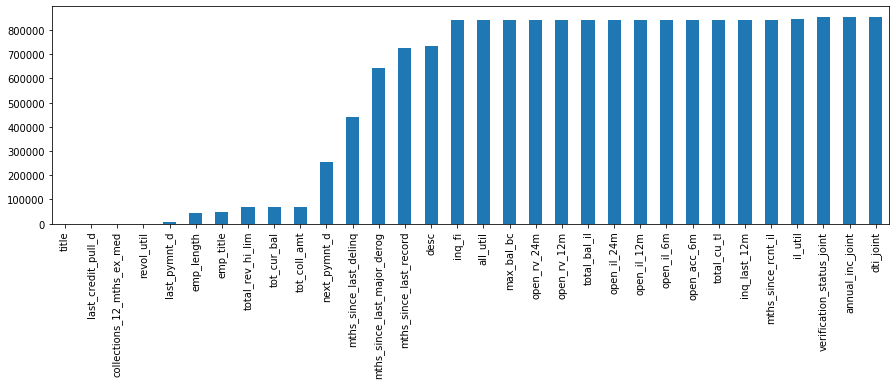

In [6]:
get_na(data)

In [7]:
## Removing Columns those are having more than 70% missing data
drop_columns_list = ['mths_since_last_major_derog', 'mths_since_last_record','desc', 'inq_fi','all_util','max_bal_bc',
                     'open_rv_24m','open_rv_12m','total_bal_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m',
                     'total_cu_tl','inq_last_12m','mths_since_rcnt_il','il_util','verification_status_joint',
                     'annual_inc_joint','dti_joint']

In [8]:
# Dropping Columns those having more than 70% NA Values
print('Before Dropping Shape of Data :{}'.format(data.shape))
data.drop(drop_columns_list, inplace = True, axis = 1)
print('After Dropping Shape of Data :{}'.format(data.shape))

Before Dropping Shape of Data :(855969, 73)
After Dropping Shape of Data :(855969, 53)


In [9]:
# Dropping ['id', 'member_id'] as it will not play important role into model building process.
print('Before Dropping Shape of Data :{}'.format(data.shape))
data.drop(['id', 'member_id'],inplace = True, axis = 1)
print('After Dropping Shape of Data :{}'.format(data.shape))

Before Dropping Shape of Data :(855969, 53)
After Dropping Shape of Data :(855969, 51)


In [10]:
# Feature List
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [11]:
# zip_code
data.zip_code.head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

In [12]:
# We are dropping zip_code as it can't be use into model building
data.drop('zip_code', inplace = True, axis = 1)

In [13]:
# Reviewing policy_code Column
data.policy_code.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: policy_code, dtype: float64

In [14]:
data.policy_code.value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [15]:
# We are dropping policy_code as it only have one label for entire dataset that will lead to bias into model
data.drop('policy_code', inplace = True, axis = 1)

In [16]:
# emp_title - The job title supplied by the Borrower when applying for the loan.
data.emp_title.head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [17]:
data.emp_title.value_counts()

Teacher                                     12965
Manager                                     10821
Registered Nurse                             5341
RN                                           5182
Owner                                        5157
Supervisor                                   4792
Sales                                        4051
Project Manager                              3856
Driver                                       3417
Office Manager                               3404
Director                                     3067
General Manager                              3060
manager                                      2994
teacher                                      2820
owner                                        2727
Engineer                                     2574
President                                    2478
driver                                       2319
Vice President                               2283
Attorney                                     2074


In [18]:
# Dropping emp_title as it is having 290912 lables and it will not impact on model.
data.drop('emp_title',inplace = True, axis = 1)

In [19]:
# Treatment for emp_length - Employment length in years.
data.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [20]:
data.emp_length = data.emp_length.str.replace(r'\D', '')
data.emp_length.head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: object

In [21]:
data.emp_length.isna().sum()

43061

In [22]:
data.emp_length.value_counts()

10    282090
1     122452
2      75986
3      67392
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

In [23]:
# Filling NA values
data.emp_length.fillna(0, inplace = True)
# Change Datatype of variable to numeric as it is represanting no of years
data.emp_length = data.emp_length.astype('int32')
data.emp_length.dtype

dtype('int32')

In [24]:
# Treatment for term Variable - The number of payments on the loan. Values are in months and can be either 36 or 60.
data.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [25]:
data.term.value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [26]:
# last_credit_pull_d - The most recent month XYZ corp. pulled credit for this loan
data.last_credit_pull_d.head()

0    Jan-2016
1    Sep-2013
2    Jan-2016
3    Jan-2015
4    Jan-2016
Name: last_credit_pull_d, dtype: object

In [27]:
# next_pymnt_d - Next scheduled payment date
data.next_pymnt_d.head()

0         NaN
1         NaN
2         NaN
3         NaN
4    Feb-2016
Name: next_pymnt_d, dtype: object

In [28]:
# earliest_cr_line - The month the borrower's earliest reported credit line was opened
data.earliest_cr_line.head()

0    Jan-1985
1    Apr-1999
2    Nov-2001
3    Feb-1996
4    Jan-1996
Name: earliest_cr_line, dtype: object

In [29]:
# Dropping Time Variables (Dates) from dataset
date_cols = ['last_credit_pull_d', 'next_pymnt_d', 'earliest_cr_line']
data.drop(date_cols,inplace = True, axis = 1)

In [30]:
# title - The loan title provided by the borrower
data.title.head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

In [31]:
data.title.value_counts()

Debt consolidation                          398089
Credit card refinancing                     159228
Home improvement                             38633
Other                                        30522
Debt Consolidation                           15469
Major purchase                               11519
Medical expenses                              6408
Business                                      6325
Car financing                                 5372
Consolidation                                 5266
debt consolidation                            4718
Debt Consolidation Loan                       3744
Moving and relocation                         3724
Vacation                                      3640
Credit Card Consolidation                     2326
Home buying                                   2229
consolidation                                 2120
Personal Loan                                 2057
Consolidation Loan                            1743
Home Improvement               

In [32]:
data.drop('title', axis = 1, inplace = True)

In [33]:
# verification_status - Was the income source verified
data.verification_status.head()

0           Verified
1    Source Verified
2       Not Verified
3    Source Verified
4    Source Verified
Name: verification_status, dtype: object

In [34]:
# Mapping and Set Lable for 'Source Verified' to 'Verified'
data.verification_status = data.verification_status.map({'Verified': 'Verified', 'Source Verified': 'Verified','Not Verified':'Not Verified'})

In [35]:
# application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers
data.application_type.head()

0    INDIVIDUAL
1    INDIVIDUAL
2    INDIVIDUAL
3    INDIVIDUAL
4    INDIVIDUAL
Name: application_type, dtype: object

In [36]:
data.application_type.value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

In [37]:
# application_type is not having sufficient Joint Label cases so We can Drop it
data.drop('application_type', axis= 1, inplace = True)

In [38]:
# addr_state - The state provided by the borrower in the loan application
data.addr_state.head()

0    AZ
1    GA
2    IL
3    CA
4    OR
Name: addr_state, dtype: object

In [39]:
print('Total No of values for state : {}'.format(len(data.addr_state.value_counts())))

Total No of values for state : 51


In [40]:
# purpose - A category provided by the borrower for the loan request
data.purpose.head()

0       credit_card
1               car
2    small_business
3             other
4             other
Name: purpose, dtype: object

In [41]:
data.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [42]:
data.purpose = data.purpose.map({'debt_consolidation': 'debt_consolidation','credit_card':'credit_card',
'home_improvement':'home_improvement', 'major_purchase':'Personal', 'small_business':'Personal', 'car':'Personal', 
'medical':'Personal','moving':'Personal','vacation':'Personal', 'house':'home_improvement', 'wedding':'Personal', 
'renewable_energy':'Personal', 'educational':'Personal'})

Here we add <b>'Personal'</b> class for all personal reason and club all together. And House is replaced with Home Improvement.

In [43]:
data.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
Personal               56015
home_improvement       53469
Name: purpose, dtype: int64

In [44]:
data.purpose.fillna('Other', inplace = True)

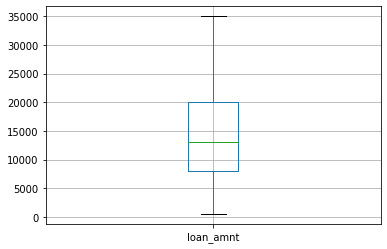

In [45]:
# loan_amnt - The listed amount of the loan applied for by the borrower.
data.boxplot(column ="loan_amnt")

In [46]:
# home_ownership - The home ownership status provided by the borrower during registratio
data.home_ownership.head()

0    RENT
1    RENT
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: object

In [47]:
data.home_ownership.value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [48]:
# Replacing OTHER , NONE , ANY to Other for Reducing Columns while Dummy Coding
data.home_ownership = data.home_ownership.map({'MORTGAGE':'Mortgage', 'RENT': 'Rent', 'OWN':'Own', 'OTHER':'Other', 'NONE': 'Other','ANY':'Other' })

In [49]:
data.home_ownership.value_counts()

Mortgage    429106
Rent        342535
Own          84136
Other          192
Name: home_ownership, dtype: int64

In [50]:
# grade - Assigned loan grade
data.grade.head()

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object

In [51]:
# sub_grade - Assigned loan sub_grade
data.sub_grade.head()

0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object

In [52]:
# Grade and Sub_grade are similar kind of factor. In this case Sub_grade can be better parameter to consider into model building process. So, we can remove Grade from dataset.
data.drop('grade',inplace = True, axis = 1)

In [53]:
# open_acc - The number of in the borrower's credit file.
data.open_acc.head()

0     3.0
1     3.0
2     2.0
3    10.0
4    15.0
Name: open_acc, dtype: float64

In [54]:
# Converting Datatype of open_acc as it is representing numbers
data.open_acc = data.open_acc.astype('int32')
data.open_acc.dtype

dtype('int32')

In [55]:
# delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
data.delinq_2yrs.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: delinq_2yrs, dtype: float64

In [56]:
# Here we are converting this feature into class variable based on occurances of delinquency.
data['delinq_2yrs'] = np.where((data['delinq_2yrs'] < 4), 'Low' , 'High')

In [57]:
# funded_amnt - The total amount committed to that loan at that point in time.
data.funded_amnt.head()

0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt, dtype: float64

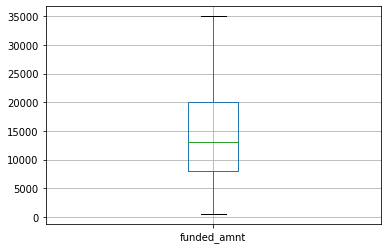

In [58]:
data.boxplot(column ="funded_amnt")

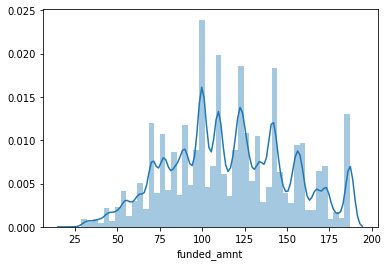

In [59]:
sns.distplot(np.sqrt(data.funded_amnt))

In [60]:
# funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
data.funded_amnt_inv.head()

0     4975.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: funded_amnt_inv, dtype: float64

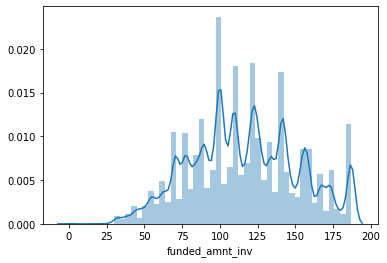

In [61]:
sns.distplot(np.sqrt(data.funded_amnt_inv))

In [62]:
# Checking Corelation with funded_amnt_inv and funded_amnt for avoid Multicolinearity
funced_df = pd.DataFrame(data.funded_amnt_inv, data.funded_amnt)
funced_df.corr()

funded_amnt_inv
funded_amnt_inv              1.0

NOTE: As we can see funded_amnt_inv and funded_amnt is having perfect corelation so we can drop one of them.

In [63]:
data.drop('funded_amnt_inv', axis= 1, inplace = True)

In [64]:
# int_rate - Interest Rate on the loan
data.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [65]:
# installment - The monthly payment owed by the borrower if the loan originates.
data.installment.head()

0    162.87
1     59.83
2     84.33
3    339.31
4     67.79
Name: installment, dtype: float64

In [66]:
# annual_inc - The self-reported annual income provided by the borrower during registration.
data.annual_inc.head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64

In [67]:
# pymnt_plan - Indicates if a payment plan has been put in place for the loan
data.pymnt_plan.head()

0    n
1    n
2    n
3    n
4    n
Name: pymnt_plan, dtype: object

In [68]:
data.pymnt_plan.value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [69]:
# We can't consider pymnt_plan column as it is showing same value for almost all records
data.drop('pymnt_plan', axis = 1, inplace= True)

In [70]:
# dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
# excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
data.dti.head()

0    27.65
1     1.00
2     8.72
3    20.00
4    17.94
Name: dti, dtype: float64

In [71]:
# pub_rec - Number of derogatory public records
data.pub_rec.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec, dtype: float64

In [72]:
data.pub_rec.value_counts()

0.0     725455
1.0     108920
2.0      14250
3.0       4305
4.0       1496
5.0        728
6.0        366
7.0        167
8.0        110
9.0         46
10.0        41
11.0        21
12.0        14
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
19.0         2
49.0         2
40.0         1
26.0         1
63.0         1
22.0         1
28.0         1
86.0         1
34.0         1
23.0         1
54.0         1
Name: pub_rec, dtype: int64

In [73]:
#Feature Engineering for pub_rec. If Number of derogatory public records is less than 3 will go for good else go in fever of bad
data.pub_rec = np.where(data.pub_rec <= 2, 'Good', 'Bad')

In [74]:
# revol_bal - Total credit revolving balance
data.revol_bal.head()

0    13648.0
1     1687.0
2     2956.0
3     5598.0
4    27783.0
Name: revol_bal, dtype: float64

In [75]:
# revol_util - Revolving line utilization rate, or 
# the amount of credit the borrower is using relative to all available revolving credit.
data.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [76]:
data.revol_util.fillna(data.revol_util.mean(),inplace = True )

In [77]:
# total_acc - The total number of credit lines currently in the borrower's credit file
data.total_acc.head()

0     9.0
1     4.0
2    10.0
3    37.0
4    38.0
Name: total_acc, dtype: float64

In [78]:
# out_prncp - Remaining outstanding principal for total amount funded
data.out_prncp.head()

0      0.0
1      0.0
2      0.0
3      0.0
4    766.9
Name: out_prncp, dtype: float64

In [79]:
# out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
data.out_prncp_inv.head()

0      0.0
1      0.0
2      0.0
3      0.0
4    766.9
Name: out_prncp_inv, dtype: float64

In [80]:
# Checking Corelation with out_prncp_inv and out_prncp for avoid Multicolinearity
out_prncp_df = pd.DataFrame(data.out_prncp_inv, data.out_prncp)
out_prncp_df.corr()

out_prncp_inv
out_prncp_inv            1.0

NOTE: As we can see out_prncp_inv and out_prncp are perfectly corelated with eachother so we can drop out_prncp_inv form dataset to avoid multi-colinearity.

In [81]:
data.drop('out_prncp_inv', axis=1, inplace= True)

In [82]:
# total_pymnt - Payments received to date for total amount funded
data.total_pymnt.head()

0     5861.071414
1     1008.710000
2     3003.653644
3    12226.302212
4     3242.170000
Name: total_pymnt, dtype: float64

In [83]:
# total_pymnt_inv - Payments received to date for portion of total amount funded by investors
data.total_pymnt_inv.head()

0     5831.78
1     1008.71
2     3003.65
3    12226.30
4     3242.17
Name: total_pymnt_inv, dtype: float64

In [84]:
# Checking Corelation with total_pymnt_inv and total_pymnt for avoid Multicolinearity
out_prncp_df = pd.DataFrame(data.total_pymnt_inv, data.total_pymnt)
out_prncp_df.corr()

total_pymnt_inv
total_pymnt_inv              1.0

NOTE: As we can see total_pymnt_inv and total_pymnt are perfectly corelated with eachother so we can drop out_prncp_inv form 
dataset to avoid multi-colinearity.

In [85]:
data.drop('total_pymnt_inv', axis=1, inplace= True)

In [86]:
# total_rec_prncp - Principal received to date
data.total_rec_prncp.head()

0     5000.00
1      456.46
2     2400.00
3    10000.00
4     2233.10
Name: total_rec_prncp, dtype: float64

In [87]:
# total_rec_int - Interest received to date
data.total_rec_int.head()

0     861.07
1     435.17
2     603.65
3    2209.33
4    1009.07
Name: total_rec_int, dtype: float64

In [88]:
# collection_recovery_fee - post charge off collection fee
data.collection_recovery_fee.head()

0    0.00
1    1.11
2    0.00
3    0.00
4    0.00
Name: collection_recovery_fee, dtype: float64

In [89]:
# recoveries - post charge off gross recovery
data.recoveries.head()

0      0.00
1    117.08
2      0.00
3      0.00
4      0.00
Name: recoveries, dtype: float64

In [90]:
# last_pymnt_d - Last month payment was received
data.last_pymnt_d.head()

0    Jan-2015
1    Apr-2013
2    Jun-2014
3    Jan-2015
4    Jan-2016
Name: last_pymnt_d, dtype: object

In [91]:
data.drop('last_pymnt_d', inplace = True, axis = 1)

In [92]:
# last_pymnt_amnt - Last total payment amount received
data.last_pymnt_amnt.head()

0    171.62
1    119.66
2    649.91
3    357.48
4     67.79
Name: last_pymnt_amnt, dtype: float64

In [93]:
# collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections
data.collections_12_mths_ex_med.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: collections_12_mths_ex_med, dtype: float64

In [94]:
data.collections_12_mths_ex_med.fillna(round(data.collections_12_mths_ex_med.mean(),2), inplace = True)

In [95]:
# acc_now_delinq - The number of accounts on which the borrower is now delinquent.
data.acc_now_delinq.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: acc_now_delinq, dtype: float64

In [96]:
# tot_coll_amt - Total collection amounts ever owed
data.tot_coll_amt.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: tot_coll_amt, dtype: float64

In [97]:
data.tot_coll_amt.fillna(round(data.tot_coll_amt.mean(),2), inplace = True)

In [98]:
# tot_cur_bal - Total collection amounts ever owed
data.tot_cur_bal.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: tot_cur_bal, dtype: float64

In [99]:
data.tot_cur_bal.fillna(round(data.tot_cur_bal.mean(),2), inplace = True)

In [100]:
# total_rev_hi_lim - Total revolving high credit/credit limit
data.total_rev_hi_lim.tail()

855964    17100.0
855965    10200.0
855966    18000.0
855967    27000.0
855968    41700.0
Name: total_rev_hi_lim, dtype: float64

In [101]:
data.total_rev_hi_lim.fillna(round(data.total_rev_hi_lim.mean(),2), inplace = True)

In [102]:
# mths_since_last_delinq - The number of months since the borrower's last delinquency.
data.mths_since_last_delinq.head()

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

In [103]:
data.mths_since_last_delinq.fillna(0,inplace= True)

In [104]:
get_na(data)

No column have NA values


In [105]:
# Sorting Data according to issue_d column
data.issue_d = pd.to_datetime(data.issue_d)
data = data.set_index(data.issue_d)
data = data.sort_index()

# Dropping issue_d as it is not required now
data.drop('issue_d', axis = 1, inplace = True)

In [106]:
data.head()

loan_amnt  funded_amnt        term  int_rate  installment  \
issue_d                                                                 
2007-06-01     7500.0       7500.0   36 months     13.75       255.43   
2007-07-01     5000.0       5000.0   36 months      7.43       155.38   
2007-07-01     5750.0       5750.0   36 months      7.43       178.69   
2007-07-01     5000.0       5000.0   36 months      7.43       155.38   
2007-07-01     1200.0       1200.0   36 months     11.54        39.60   

           sub_grade  emp_length home_ownership  annual_inc  \
issue_d                                                       
2007-06-01        E2           1            Own     22000.0   
2007-07-01        A2           8       Mortgage    150000.0   
2007-07-01        A2          10       Mortgage    125000.0   
2007-07-01        A2           6           Rent     40000.0   
2007-07-01        C5           1           Rent     20000.0   

           verification_status  ... total_rec_late_fee recoveries  \
issue_d                         ...                                 
2007-06-01        Not Verified  ...                0.0        0.0   
2007-07-01        Not Verified  ...                0.0        0.0   
2007-07-01        Not Verified  ...                0.0        0.0   
2007-07-01        Not Verified  ...                0.0        0.0   
2007-07-01        Not Verified  ...                0.0        0.0   

            collection_recovery_fee last_pymnt_amnt  \
issue_d                                               
2007-06-01                      0.0          256.59   
2007-07-01                      0.0         4397.47   
2007-07-01                      0.0            4.74   
2007-07-01                      0.0          158.65   
2007-07-01                      0.0           39.45   

            collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
issue_d                                                                
2007-06-01                        0.01             0.0        225.41   
2007-07-01                        0.01             0.0        225.41   
2007-07-01                        0.01             0.0        225.41   
2007-07-01                        0.01             0.0        225.41   
2007-07-01                        0.01             0.0        225.41   

           tot_cur_bal  total_rev_hi_lim  default_ind  
issue_d                                                
2007-06-01   139766.25          32163.57            0  
2007-07-01   139766.25          32163.57            0  
2007-07-01   139766.25          32163.57            0  
2007-07-01   139766.25          32163.57            0  
2007-07-01   139766.25          32163.57            0  

[5 rows x 36 columns]

In [107]:
data.shape

(855969, 36)

References:
* https://seaborn.pydata.org/
* https://seaborn.pydata.org/tutorial/categorical.html
* https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
* https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
* https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

<a id='outlier_treatment'></a>
### Outlier Treatment

In [108]:
# Upper Caping and Lower Caping for numerical Feature

def set_caping(column, capping):
   
    mean = data[column].mean() # Mean of the column
    std = data[column].std() # Standard Deviation of the column
   
    UCL = mean + 3 * std
    LCL = mean - 3 * std
    if capping == "both":
        data[column] = np.where((data[column] > UCL), UCL , data[column])
        data[column] = np.where((data[column] < UCL), LCL , data[column])
       
    elif capping == "upper":
        data[column] = np.where((data[column] > UCL), UCL , data[column])
       
    elif capping == "lower":
        data[column] = np.where((data[column] < UCL), LCL ,data[column])
    else:
        print("Please enter proper value of capping parameter. \n Possible values:\tboth\tupper\tlower")


# set_caping("age", capping = "both")
# data.boxplot(column = "age")

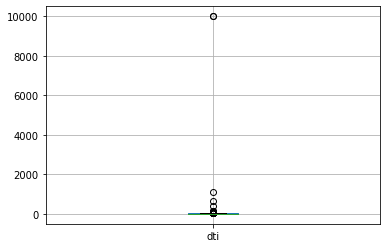

In [109]:
data.boxplot(column ="dti")

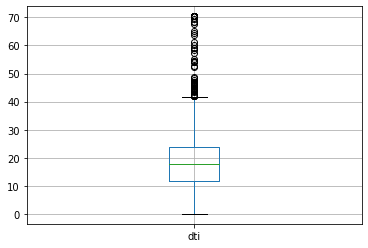

In [110]:
set_caping("dti", capping = "upper")
data.boxplot(column ="dti")

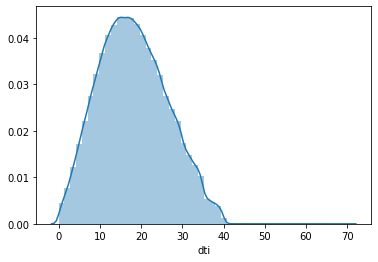

In [111]:
sns.distplot(data.dti)

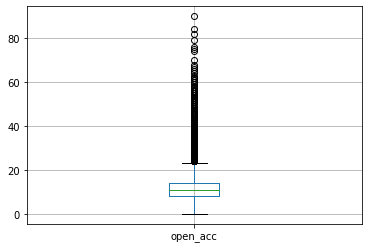

In [112]:
data.boxplot(column ="open_acc")

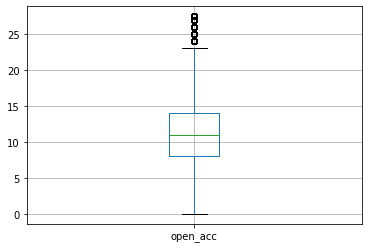

In [113]:
set_caping("open_acc", capping = "upper")
data.boxplot(column ="open_acc")

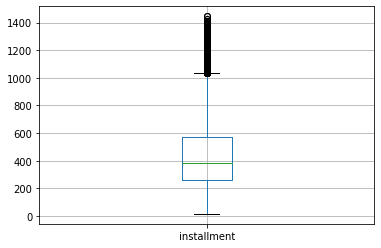

In [114]:
data.boxplot(column ="installment")

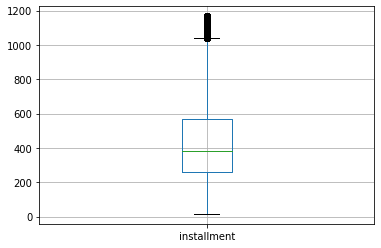

In [115]:
set_caping("installment", capping = "upper")
data.boxplot(column ="installment")

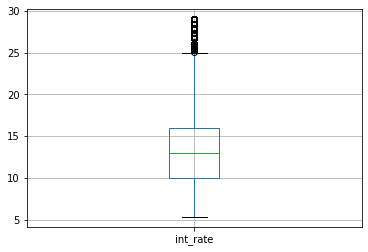

In [116]:
data.boxplot(column ="int_rate")

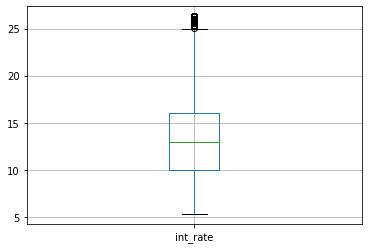

In [117]:
set_caping("int_rate", capping = "upper")
data.boxplot(column ="int_rate")

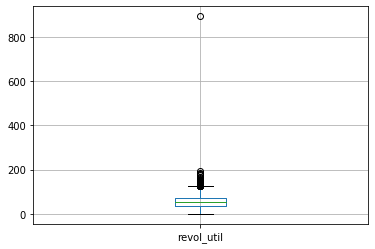

In [118]:
data.boxplot(column ="revol_util")

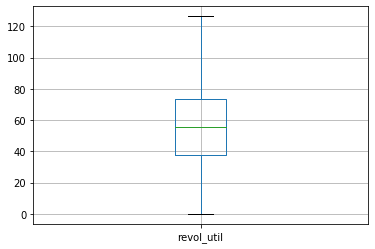

In [119]:
set_caping("revol_util", capping = "upper")
data.boxplot(column ="revol_util")

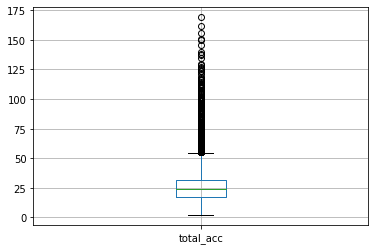

In [120]:
data.boxplot(column ="total_acc")

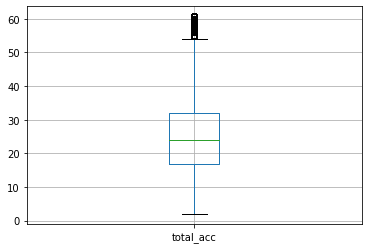

In [121]:
set_caping("total_acc", capping = "upper")
data.boxplot(column ="total_acc")

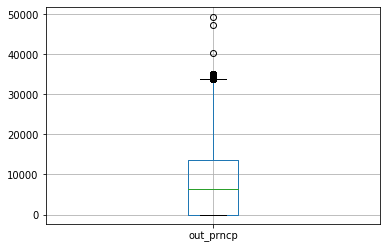

In [122]:
data.boxplot(column ="out_prncp")

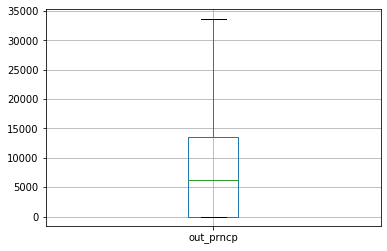

In [123]:
set_caping("out_prncp", capping = "upper")
data.boxplot(column ="out_prncp")

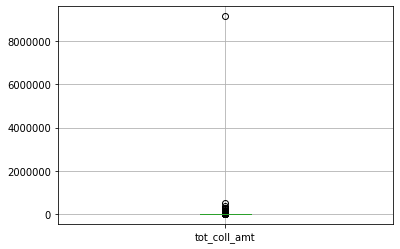

In [124]:
data.boxplot(column ="tot_coll_amt")

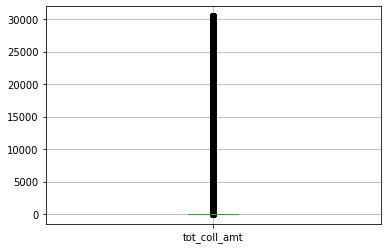

In [125]:
set_caping("tot_coll_amt", capping = "upper")
data.boxplot(column ="tot_coll_amt")

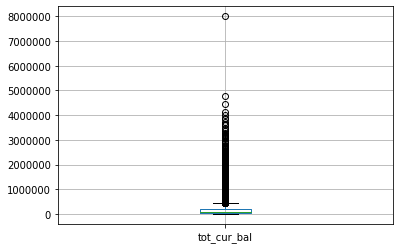

In [126]:
data.boxplot(column ="tot_cur_bal")

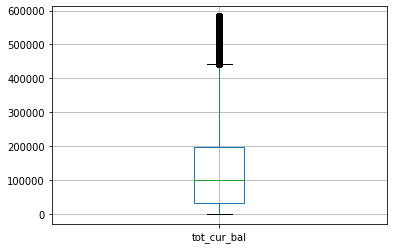

In [127]:
set_caping("tot_cur_bal", capping = "upper")
data.boxplot(column ="tot_cur_bal")

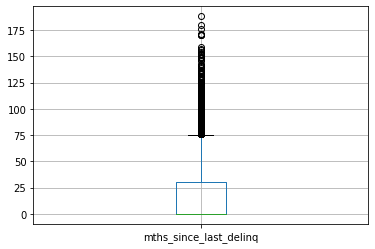

In [128]:
data.boxplot(column ="mths_since_last_delinq")

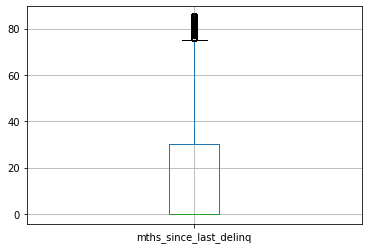

In [129]:
set_caping("mths_since_last_delinq", capping = "upper")
data.boxplot(column ="mths_since_last_delinq")

<a id='eda'></a>
## EDA - Exploratory Data Analysis

In [130]:
# Devide Categorical And Numerical Data
cat_data = data.select_dtypes('O')
num_data = data.drop(cat_data, axis=1)

In [131]:
cat_data.head()

term sub_grade home_ownership verification_status  \
issue_d                                                               
2007-06-01   36 months        E2            Own        Not Verified   
2007-07-01   36 months        A2       Mortgage        Not Verified   
2007-07-01   36 months        A2       Mortgage        Not Verified   
2007-07-01   36 months        A2           Rent        Not Verified   
2007-07-01   36 months        C5           Rent        Not Verified   

                       purpose addr_state delinq_2yrs pub_rec  \
issue_d                                                         
2007-06-01  debt_consolidation         MA         Low    Good   
2007-07-01    home_improvement         GA         Low    Good   
2007-07-01  debt_consolidation         MA         Low    Good   
2007-07-01            Personal         WI         Low    Good   
2007-07-01         credit_card         ME         Low    Good   

           initial_list_status  
issue_d                         
2007-06-01                   f  
2007-07-01                   f  
2007-07-01                   f  
2007-07-01                   f  
2007-07-01                   f

In [132]:
num_data.head()

loan_amnt  funded_amnt  int_rate  installment  emp_length  \
issue_d                                                                 
2007-06-01     7500.0       7500.0     13.75       255.43           1   
2007-07-01     5000.0       5000.0      7.43       155.38           8   
2007-07-01     5750.0       5750.0      7.43       178.69          10   
2007-07-01     5000.0       5000.0      7.43       155.38           6   
2007-07-01     1200.0       1200.0     11.54        39.60           1   

            annual_inc    dti  inq_last_6mths  mths_since_last_delinq  \
issue_d                                                                 
2007-06-01     22000.0  14.29             0.0                    11.0   
2007-07-01    150000.0   0.00             0.0                     0.0   
2007-07-01    125000.0   0.27             0.0                     0.0   
2007-07-01     40000.0   2.55             2.0                     0.0   
2007-07-01     20000.0   2.04             2.0                    24.0   

            open_acc  ...  total_rec_late_fee  recoveries  \
issue_d               ...                                   
2007-06-01       7.0  ...                 0.0         0.0   
2007-07-01       2.0  ...                 0.0         0.0   
2007-07-01      10.0  ...                 0.0         0.0   
2007-07-01       4.0  ...                 0.0         0.0   
2007-07-01       3.0  ...                 0.0         0.0   

            collection_recovery_fee  last_pymnt_amnt  \
issue_d                                                
2007-06-01                      0.0           256.59   
2007-07-01                      0.0          4397.47   
2007-07-01                      0.0             4.74   
2007-07-01                      0.0           158.65   
2007-07-01                      0.0            39.45   

            collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
issue_d                                                                
2007-06-01                        0.01             0.0        225.41   
2007-07-01                        0.01             0.0        225.41   
2007-07-01                        0.01             0.0        225.41   
2007-07-01                        0.01             0.0        225.41   
2007-07-01                        0.01             0.0        225.41   

            tot_cur_bal  total_rev_hi_lim  default_ind  
issue_d                                                 
2007-06-01    139766.25          32163.57            0  
2007-07-01    139766.25          32163.57            0  
2007-07-01    139766.25          32163.57            0  
2007-07-01    139766.25          32163.57            0  
2007-07-01    139766.25          32163.57            0  

[5 rows x 27 columns]

#### EDA for Categorical Variables

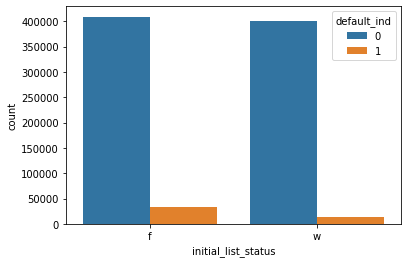

In [133]:
sns.countplot(data = data, x = 'initial_list_status', hue="default_ind")

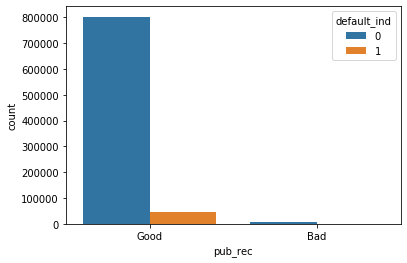

In [134]:
sns.countplot(data = data, x = 'pub_rec', hue="default_ind")

In [135]:
# We can Drop addr_state columns as it is not significant.
data.drop('addr_state', axis = 1 , inplace = True)

<Figure size 1008x576 with 0 Axes>

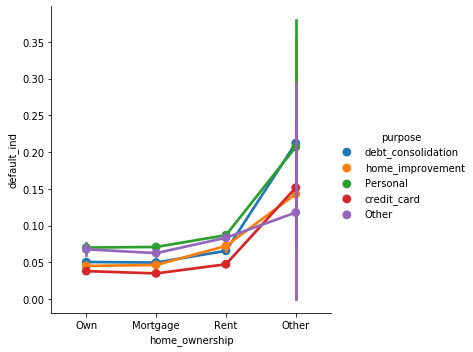

In [136]:
plt.figure(figsize=(14,8))
sns.catplot(x="home_ownership", y="default_ind", hue="purpose", kind="point", data=data)

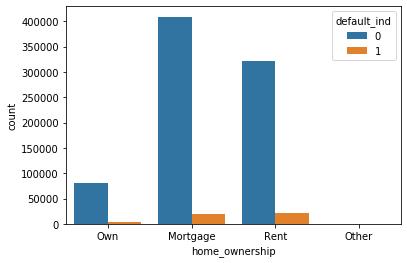

In [137]:
sns.countplot(data = data, x = 'home_ownership', hue="default_ind")

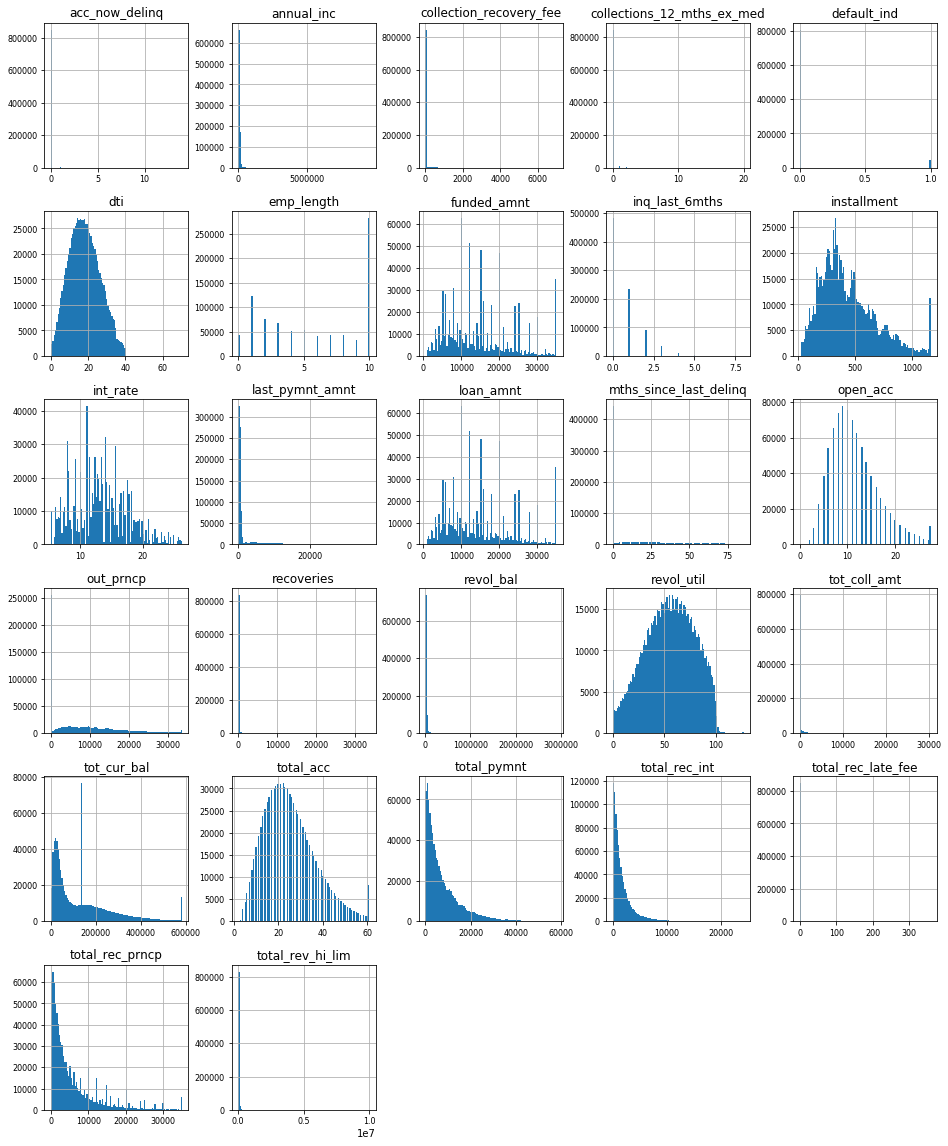

In [138]:
# Checking Skewness
num_data.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8);

### References:
* https://seaborn.pydata.org/
* https://seaborn.pydata.org/tutorial/categorical.html
* https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
* https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
* https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

In [139]:
data.to_csv('dataset/ref_data.csv')

<a id='pca'></a>
### Dimensionality Reduction For Numerical Data with PCA
    
<b>Scaling Numerical Variables</b>

In [231]:
data = pd.read_csv('dataset/ref_data.csv')

In [174]:
data.head()

issue_d  loan_amnt  funded_amnt        term  int_rate  installment  \
0  2007-06-01     7500.0       7500.0   36 months     13.75       255.43   
1  2007-07-01     5000.0       5000.0   36 months      7.43       155.38   
2  2007-07-01     5750.0       5750.0   36 months      7.43       178.69   
3  2007-07-01     5000.0       5000.0   36 months      7.43       155.38   
4  2007-07-01     1200.0       1200.0   36 months     11.54        39.60   

  sub_grade  emp_length home_ownership  annual_inc  ... total_rec_late_fee  \
0        E2           1            Own     22000.0  ...                0.0   
1        A2           8       Mortgage    150000.0  ...                0.0   
2        A2          10       Mortgage    125000.0  ...                0.0   
3        A2           6           Rent     40000.0  ...                0.0   
4        C5           1           Rent     20000.0  ...                0.0   

  recoveries  collection_recovery_fee last_pymnt_amnt  \
0        0.0                      0.0          256.59   
1        0.0                      0.0         4397.47   
2        0.0                      0.0            4.74   
3        0.0                      0.0          158.65   
4        0.0                      0.0           39.45   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt tot_cur_bal  \
0                        0.01             0.0        225.41   139766.25   
1                        0.01             0.0        225.41   139766.25   
2                        0.01             0.0        225.41   139766.25   
3                        0.01             0.0        225.41   139766.25   
4                        0.01             0.0        225.41   139766.25   

   total_rev_hi_lim  default_ind  
0          32163.57            0  
1          32163.57            0  
2          32163.57            0  
3          32163.57            0  
4          32163.57            0  

[5 rows x 36 columns]

In [175]:
# Devide Categorical And Numerical Data
cat_data = data.select_dtypes('O')
num_data = data.drop(cat_data, axis=1)

In [176]:
num_data.head()

loan_amnt  funded_amnt  int_rate  installment  emp_length  annual_inc  \
0     7500.0       7500.0     13.75       255.43           1     22000.0   
1     5000.0       5000.0      7.43       155.38           8    150000.0   
2     5750.0       5750.0      7.43       178.69          10    125000.0   
3     5000.0       5000.0      7.43       155.38           6     40000.0   
4     1200.0       1200.0     11.54        39.60           1     20000.0   

     dti  inq_last_6mths  mths_since_last_delinq  open_acc  ...  \
0  14.29             0.0                    11.0       7.0  ...   
1   0.00             0.0                     0.0       2.0  ...   
2   0.27             0.0                     0.0      10.0  ...   
3   2.55             2.0                     0.0       4.0  ...   
4   2.04             2.0                    24.0       3.0  ...   

   total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  \
0                 0.0         0.0                      0.0           256.59   
1                 0.0         0.0                      0.0          4397.47   
2                 0.0         0.0                      0.0             4.74   
3                 0.0         0.0                      0.0           158.65   
4                 0.0         0.0                      0.0            39.45   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                        0.01             0.0        225.41    139766.25   
1                        0.01             0.0        225.41    139766.25   
2                        0.01             0.0        225.41    139766.25   
3                        0.01             0.0        225.41    139766.25   
4                        0.01             0.0        225.41    139766.25   

   total_rev_hi_lim  default_ind  
0          32163.57            0  
1          32163.57            0  
2          32163.57            0  
3          32163.57            0  
4          32163.57            0  

[5 rows x 27 columns]

In [177]:
cat_data.head()

issue_d        term sub_grade home_ownership verification_status  \
0  2007-06-01   36 months        E2            Own        Not Verified   
1  2007-07-01   36 months        A2       Mortgage        Not Verified   
2  2007-07-01   36 months        A2       Mortgage        Not Verified   
3  2007-07-01   36 months        A2           Rent        Not Verified   
4  2007-07-01   36 months        C5           Rent        Not Verified   

              purpose delinq_2yrs pub_rec initial_list_status  
0  debt_consolidation         Low    Good                   f  
1    home_improvement         Low    Good                   f  
2  debt_consolidation         Low    Good                   f  
3            Personal         Low    Good                   f  
4         credit_card         Low    Good                   f

In [178]:
cat_data.drop('issue_d', axis=1, inplace = True)

C:\Users\HP\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [179]:
# Getting Dummies for Categorical Features
cat_data_dummies = pd.get_dummies(cat_data, drop_first = True)

In [180]:
cat_data_dummies.head()

term_ 60 months  sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  \
0                0             0             0             0             0   
1                0             1             0             0             0   
2                0             1             0             0             0   
3                0             1             0             0             0   
4                0             0             0             0             0   

   sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  sub_grade_B5  ...  \
0             0             0             0             0             0  ...   
1             0             0             0             0             0  ...   
2             0             0             0             0             0  ...   
3             0             0             0             0             0  ...   
4             0             0             0             0             0  ...   

   home_ownership_Own  home_ownership_Rent  verification_status_Verified  \
0                   1                    0                             0   
1                   0                    0                             0   
2                   0                    0                             0   
3                   0                    1                             0   
4                   0                    1                             0   

   purpose_Personal  purpose_credit_card  purpose_debt_consolidation  \
0                 0                    0                           1   
1                 0                    0                           0   
2                 0                    0                           1   
3                 1                    0                           0   
4                 0                    1                           0   

   purpose_home_improvement  delinq_2yrs_Low  pub_rec_Good  \
0                         0                1             1   
1                         1                1             1   
2                         0                1             1   
3                         0                1             1   
4                         0                1             1   

   initial_list_status_w  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 46 columns]

In [181]:
from sklearn.preprocessing import StandardScaler as sc

In [182]:
# Standardise Numeric data
stanard_pca_data = sc().fit_transform(num_data)

In [183]:
# Calculating covarience_matrix
cov_mat = np.cov(stanard_pca_data.T)  ## Pass transpose of  matrix as it require data row vise

In [184]:
# Find Eigen values, Eigen vectors 
eig_values, eig_vectors = np.linalg.eig(cov_mat)

In [185]:
# Eigen values and vectors pair vise
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

In [186]:
# Ordering Eigen values and vectors descending manner
total = sum(eig_values)
var_exp = [(i / total)*100 for i in sorted(eig_values, reverse=True)]
print("Variance explained:", var_exp)

Variance explained: [19.413874842871472, 10.371658380591004, 8.282464615155533, 7.2433629737475815, 5.907358217447913, 5.07752156702491, 4.231390164549699, 3.9641547114550266, 3.8819515894532466, 3.7217656267650145, 3.631618369578798, 3.428941665513923, 3.377588571591409, 3.163808765893275, 2.638054008099585, 2.50693289166129, 2.228900465845327, 1.9649570331254012, 1.8775322825114387, 1.0450638328194755, 0.6704594221509897, 0.6279057459642196, 0.47905376002648153, 0.19175928793367616, 0.06926771672497133, 0.0026534914983070484, 2.4036629833325544e-14]


In [187]:
# Calculate Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:", cum_var_exp)

Cumulative explained variance: [ 19.41387484  29.78553322  38.06799784  45.31136081  51.21871903
  56.2962406   60.52763076  64.49178547  68.37373706  72.09550269
  75.72712106  79.15606272  82.5336513   85.69746006  88.33551407
  90.84244696  93.07134743  95.03630446  96.91383674  97.95890058
  98.62936     99.25726574  99.7363195   99.92807879  99.99734651
 100.         100.        ]


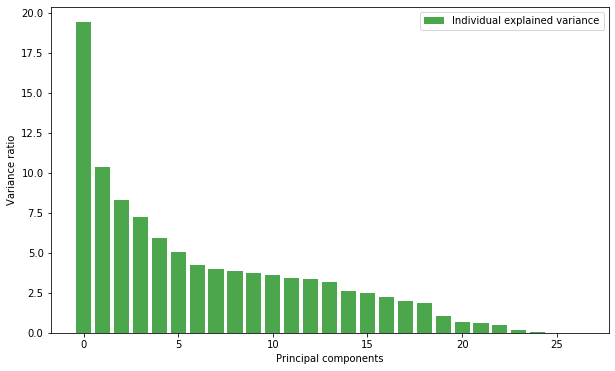

In [188]:
plt.figure(figsize=(10,6))
plt.bar(range(len(num_data.columns)), var_exp, alpha=0.7, align='center', label="Individual explained variance", color='green')
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [189]:
from sklearn.decomposition import PCA

In [190]:
# Creating PCA component
pca = PCA(n_components=6)

In [191]:
pca.fit(num_data)
print(pca.explained_variance_ratio_)

[0.77523628 0.14722482 0.05873392 0.00702459 0.00563435 0.00526622]


In [192]:
pca.explained_variance_ratio_.sum()

0.9991201848725639

In [193]:
# Preparing for add PCA vars and remove original Columns from data
numerical_col_names = list(num_data.columns)

In [194]:
# Fitting numeric Data into PCA model
optimised_columns = pca.fit_transform(num_data)

In [195]:
# Converting it into Dataframe for join dataframe
optimised_columns = pd.DataFrame(optimised_columns)
optimised_columns.columns = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6"]

In [196]:
optimised_columns.head()

PCA1          PCA2          PCA3          PCA4          PCA5  \
0 -10098.368627 -53171.134717   2532.301032   9008.163115  11823.560658   
1  18180.442027  69364.771571 -19393.611121  19334.165222  10018.958969   
2  12468.336481  45214.263161 -16390.257014  18005.810521  11719.484015   
3  -6397.892539 -36295.345541  -1614.935760  15305.699994  10696.029224   
4 -11161.849718 -55905.933075    904.783649  21654.047349   8510.690826   

          PCA6  
0 -1541.921784  
1 -4093.041959  
2 -1452.301148  
3  -561.794258  
4   408.970360

In [197]:
print("Shape of Data", data.shape)
print("Shape of PCA Components", optimised_columns.shape)

Shape of Data (855969, 36)
Shape of PCA Components (855969, 6)


In [232]:
final_data = pd.concat([data.default_ind,optimised_columns,cat_data_dummies], axis =1)

In [235]:
final_df = pd.concat([data.issue_d,final_data], axis =1)

In [236]:
final_df.shape

(855969, 54)

In [237]:
final_df.head()

issue_d  default_ind          PCA1          PCA2          PCA3  \
0  2007-06-01            0 -10098.368627 -53171.134717   2532.301032   
1  2007-07-01            0  18180.442027  69364.771571 -19393.611121   
2  2007-07-01            0  12468.336481  45214.263161 -16390.257014   
3  2007-07-01            0  -6397.892539 -36295.345541  -1614.935760   
4  2007-07-01            0 -11161.849718 -55905.933075    904.783649   

           PCA4          PCA5         PCA6  term_ 60 months  sub_grade_A2  \
0   9008.163115  11823.560658 -1541.921784                0             0   
1  19334.165222  10018.958969 -4093.041959                0             1   
2  18005.810521  11719.484015 -1452.301148                0             1   
3  15305.699994  10696.029224  -561.794258                0             1   
4  21654.047349   8510.690826   408.970360                0             0   

   ...  home_ownership_Own  home_ownership_Rent  verification_status_Verified  \
0  ...                   1                    0                             0   
1  ...                   0                    0                             0   
2  ...                   0                    0                             0   
3  ...                   0                    1                             0   
4  ...                   0                    1                             0   

   purpose_Personal  purpose_credit_card  purpose_debt_consolidation  \
0                 0                    0                           1   
1                 0                    0                           0   
2                 0                    0                           1   
3                 1                    0                           0   
4                 0                    1                           0   

   purpose_home_improvement  delinq_2yrs_Low  pub_rec_Good  \
0                         0                1             1   
1                         1                1             1   
2                         0                1             1   
3                         0                1             1   
4                         0                1             1   

   initial_list_status_w  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 54 columns]

In [239]:
final_df.to_csv('dataset/final_data.csv',index=False)

<a id='Model_Building'></a>
## Model Building

As this is classification problem. So, we can apply following algorithms.

* Logistic Regression
* Random Forest
* Support Vector Machine
* K Nearest Neighbour

In [240]:
df = pd.read_csv('dataset/final_data.csv', index_col = 'issue_d')

In [241]:
df.head()

default_ind          PCA1          PCA2          PCA3  \
issue_d                                                             
2007-06-01            0 -10098.368627 -53171.134717   2532.301032   
2007-07-01            0  18180.442027  69364.771571 -19393.611121   
2007-07-01            0  12468.336481  45214.263161 -16390.257014   
2007-07-01            0  -6397.892539 -36295.345541  -1614.935760   
2007-07-01            0 -11161.849718 -55905.933075    904.783649   

                    PCA4          PCA5         PCA6  term_ 60 months  \
issue_d                                                                
2007-06-01   9008.163115  11823.560658 -1541.921784                0   
2007-07-01  19334.165222  10018.958969 -4093.041959                0   
2007-07-01  18005.810521  11719.484015 -1452.301148                0   
2007-07-01  15305.699994  10696.029224  -561.794258                0   
2007-07-01  21654.047349   8510.690826   408.970360                0   

            sub_grade_A2  sub_grade_A3  ...  home_ownership_Own  \
issue_d                                 ...                       
2007-06-01             0             0  ...                   1   
2007-07-01             1             0  ...                   0   
2007-07-01             1             0  ...                   0   
2007-07-01             1             0  ...                   0   
2007-07-01             0             0  ...                   0   

            home_ownership_Rent  verification_status_Verified  \
issue_d                                                         
2007-06-01                    0                             0   
2007-07-01                    0                             0   
2007-07-01                    0                             0   
2007-07-01                    1                             0   
2007-07-01                    1                             0   

            purpose_Personal  purpose_credit_card  purpose_debt_consolidation  \
issue_d                                                                         
2007-06-01                 0                    0                           1   
2007-07-01                 0                    0                           0   
2007-07-01                 0                    0                           1   
2007-07-01                 1                    0                           0   
2007-07-01                 0                    1                           0   

            purpose_home_improvement  delinq_2yrs_Low  pub_rec_Good  \
issue_d                                                               
2007-06-01                         0                1             1   
2007-07-01                         1                1             1   
2007-07-01                         0                1             1   
2007-07-01                         0                1             1   
2007-07-01                         0                1             1   

            initial_list_status_w  
issue_d                            
2007-06-01                      0  
2007-07-01                      0  
2007-07-01                      0  
2007-07-01                      0  
2007-07-01                      0  

[5 rows x 53 columns]

<a id='SMOTE'></a>
### Balancing Dataset With SMOTE - Synthetic Minority Oversampling Technique

In [242]:
# Deviding Dataset into x and y
y = df['default_ind']
x = df.drop('default_ind', axis=1)

## Train Test Split
* We are using 'issue_d' column to divide the data into train and test split.
    * Train Data will consists => June 2007 - May 2015
    * Test Data will consists => June 2015 - Dec 2015
    
REF : https://stackoverflow.com/questions/37532098/split-dataframe-into-two-on-the-basis-of-date

In [243]:
# Splitting Dataframe according to Date as given in problem statement
train_dataset = df['2007-06-01':'2015-05-1']
test_dataset = df['2015-05-1':]
print('Train Dataset:',train_dataset.shape)
print('Test Dataset:',test_dataset.shape)

Train Dataset: (598978, 53)
Test Dataset: (256991, 53)


In [244]:
# Devide Dataset into Train and Test
x_train, x_test, y_train, y_test = train_dataset[x.columns] , test_dataset[x.columns] , train_dataset['default_ind'] , test_dataset['default_ind']
print("Dataset with Shape :\nx_train ",x_train.shape,"\ny_train ",y_train.shape ,"\nx_test ",x_test.shape, "\ny_test ",y_test.shape)

Dataset with Shape :
x_train  (598978, 52) 
y_train  (598978,) 
x_test  (256991, 52) 
y_test  (256991,)


## Checking Dataset Balance Records
We are checking total number of records for both classes. If we generate model with imbalance dataset then model will be bias and there is a possibilty that we will get very good accuracy but biasness can be present and ot will affect prediction.

In [245]:
train_dataset.default_ind.value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

As we can see this datset is not a valid or balance dataset.So, we can not use this for model building process. Before model building process we need to balance the dataset. We are using SMOTE - Synthetic Minority Over-sampling Technique technique for balancing dataset.

In [246]:
from imblearn.over_sampling import SMOTE

In [247]:
smt = SMOTE(random_state = 37) 
x_train_res, y_train_res = smt.fit_sample(x_train, y_train.ravel())

In [248]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

<a id='Logistic_Regression'></a>
## Logistic Regression

In [249]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs').fit(x_train_res,y_train_res)
logistic_predict = logistic_model.predict(x_test)

In [250]:
logistic_conusion_matrix = confusion_matrix(y_test,logistic_predict)
logistic_conusion_matrix

array([[ 69438, 187242],
       [    68,    243]], dtype=int64)

<a id='Random_Forest'></a>
## Random Forest

In [251]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, criterion='gini')
rf_model = rf_model.fit(x_train_res, y_train_res)
rf_model_predict = rf_model.predict(x_test)

In [252]:
rf_conusion_matrix = confusion_matrix(y_test,rf_model_predict)
rf_conusion_matrix

array([[256239,    441],
       [   301,     10]], dtype=int64)

<a id='knn'></a>
## KNN - K nearest Neighbour

In [253]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(x_train_res,y_train_res)
knn_predict = knn_model.predict(x_test)

In [254]:
knn_conusion_matrix = confusion_matrix(y_test,knn_predict)
knn_conusion_matrix

array([[239551,  17129],
       [   232,     79]], dtype=int64)

In [255]:
# Choosing a K Value with Elbow method
error_rate = []
k_list = [3,7,9,11,13,15,17,19,21,23,25,27,29]
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_res,y_train_res)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [256]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

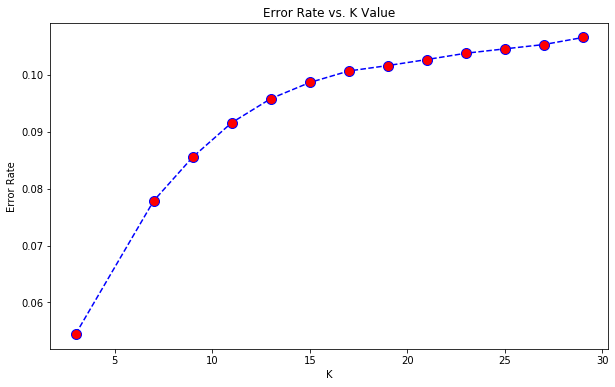

In [257]:
plt.figure(figsize=(10,6))
plt.plot(k_list,error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [258]:
knn_model2 = KNeighborsClassifier(n_neighbors=29)
knn_model2 = knn_model.fit(x_train_res,y_train_res)
knn_predict2 = knn_model2.predict(x_test)

In [259]:
knn_conusion_matrix2 = confusion_matrix(y_test,knn_predict2)
knn_conusion_matrix2

array([[239551,  17129],
       [   232,     79]], dtype=int64)

<a id='Model_Evaluation'></a>
## Model Evaluation
* Confusion Matrix
* Accuracy
* Precision
* Recall
* F1 Score

<b>Method for Report Generation</b>

In [266]:
# Report All Results into Dataframe - Creating Method Where Evaluation Parameters will generate from Concusion Matrix
report_comments, report_Accuracy, report_Precision, report_Recall , report_F1_Score= [],[],[],[],[]

def report_generate(conf_mat,comment):

    # Append Comment into List
    report_comments.append(comment)

    # Calculating Accuracy and Append into List
    accuracy = (conf_mat[1][1] + conf_mat[0][0])/ (conf_mat[1][1] + conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0])
    report_Accuracy.append(accuracy)
    
    # Calculating Precision and Append into List
    precisoin = (conf_mat[0][0])/(conf_mat[0][1] + conf_mat[0][0])
    report_Precision.append(precisoin)
    
    # Calculating Recall and Append into List
    recall = (conf_mat[0][0])/(conf_mat[1][0] + conf_mat[0][0])
    report_Recall.append(recall)
    
    # Calculating F1-Score and Append into List
    f1scrore = 2 * precisoin * recall / (precisoin + recall) 
    report_F1_Score.append(f1scrore)

In [267]:
# Report All Results into Dataframe
def show_report():
    report_data = {'Comment': report_comments,
               'Accuracy': report_Accuracy,
               'Precision': report_Precision,
               'Recall': report_Recall ,
               'F1 Score': report_F1_Score
              }
    df_results = pd.DataFrame.from_dict(report_data)
    return(df_results)

<a id='report'></a>
## Final Report

In [268]:
# Pass all Generated Confusion Matrix for generate report
report_generate(logistic_conusion_matrix, comment='After SMOTE Logistic Regression')
report_generate(knn_conusion_matrix, comment='After SMOTE KNN for K = 3')
report_generate(rf_conusion_matrix, comment='After SMOTE Random Forest')

In [269]:
show_report()

Comment  Accuracy  Precision    Recall  F1 Score
0  After SMOTE Logistic Regression  0.271142   0.270524  0.999022  0.425757
1        After SMOTE KNN for K = 3  0.932445   0.933267  0.999032  0.965031
2        After SMOTE Random Forest  0.997113   0.998282  0.998827  0.998554

<a id='Conclusion'></a>
## Conclusion

With references of the above models and model evaluations we can say that <b>Random Forest</b> model is giving the best solution for the given problem.